The fact that we can do arithmetic with arbitrarily large integers enables us to do decimal calculations to arbitrary precision as well.

__(1)__ We saw before that the iterative formula $x = (x + a/x)/2$ enables us to compute the square root of $a$. If we want accuracy to $n$ decimal places, we may multiply this formula by $10^n$: 

$$(10^n)x = \frac{(10^n)x + (10^n)a/x}{2}$$

If we let $y = (10^n)x$, then we may further rewrite this as:

$$y = \frac{y + (10^{2n})a/y}{2}$$

This gives us a strategy for finding $x$ to $n$ decimal places:

_(i)_ Use an initial value for $y$:  $y = 10^n$.

_(ii)_ Iterate $y = (y + (10^{2n})a/y)/2$ using _integer arithmetic_ until $y$ no longer changes

_(iii)_ The resulting $y$ should give the first $n$ decimal places of the square root of $a$.

_(a)_ Code the algorithm. Your first two statements should be `a=2` and `n=100`.In your code, also produce a plot of the number of places of accuracy as a function of the number of iterations.

_(b)_ Copy your code into a new cell. Convert into a function called `sqrtFn`. The function should take two arguments (`a_` and `n_`) and it should return the integer version of the square root (equal to the square root times $10^n$) and number of iterations until convergence.  (Note that I have added underscores`_` to the variables to distinguish the fact that they are arguments of a function. This is not necessary, but it may be helpful to organize things.)

_(c)_ (_Math problem_) We may use a similar strategy to find $k$'th roots for arbitrary $k$. The reasoning is as follows. We will use the particular example of the cube root of 2.  

* First, notice that if $x = 2^{1/3}$, then $x = 2/x^2$.
* Second ,let's suppose that $x$ is a little off, i.e. $x = 2^{1/3} + \delta$, where $\delta$ is small. Then we have:
$$ \frac{2}{x^2} = \frac{2}{(2^{1/3} + \delta)^2} = \frac{2}{2^{2/3} + 2^{4/3}\delta + O(\delta^2)},$$
where $O(\delta^2)$  indicates a number that proportional to $\delta^2$, hence very, very small. Using the fact that:
$$ \frac{1}{1+z} = 1 - z + z^2 - z^3 + \ldots  \qquad \text{(when } z<1,$$
we may rewrite the rightmost expression for $\frac{2}{x^2}$ as:
$$ \frac{2}{2^{2/3} + 2^{4/3}\delta + O(\delta^2)} = \frac{2}{2^{2/3}} \frac{1}{1 + 2^{2/3}\delta + O(\delta^2)}$$
$$\qquad = \frac{2}{2^{2/3}} \left( 1 -  2^{2/3}\delta + O(\delta^2) \right)$$
$$\qquad = 2^{1/3} - 2\delta + O(\delta^2).$$
Remember, this last expression is equal to $2/{x^2}$. On the other hand, we defined $\delta$ so that $x = 2^{1/3} + \delta$, which means that $\delta = x - 2^{1/3}$. Let's substitute this in for $\delta$ in the expression for $2/{x^2}$:
$$\frac{2}{x^2} = 2^{1/3} - 2(x - 2^{1/3}) + O(\delta^2).$$
We may rearrange to obtain:
$$2x + \frac{2}{x^2} = (3)2^{1/3} + O(\delta^2).$$
Solving for $2^{1/3}$, we have:
$$ 2^{1/3} = \frac{2x + 2/x^2}{3}  + O(\delta^2).$$
In summary, we may use the iterative formula:
$$ x = \frac{2x + 2/x^2}{3} $$
to successively approach the cube root of 2.

If we want to get $n$ digits, we should multiply this equation by $10^n$:
$$ (10^n)x = \frac{2(10^n)x + 2(10^n)/x^2}{3}. $$
Writing $y =  (10^n)x$, we find:
$$ y = \frac{2y + 2(10^{3n})/y^2}{3}. $$

Following this procedure, derive an iterative expression that can be used to compute the $k$'th root of $a$ to $n$ digits.

_Hints_: 
* In the above argument you should replace 3 with $k$ and 2 with $a$ and go step by step.  In the denominator, you will get the sum of two terms raised to the $k-1$ power. You may expand this using the Binomial Theorem.  In the Binomial Theorem, you only need the first two terms. All other terms are multiples of $\delta^2$ or a higher power of delta, so you can replace all the other terms with $O(\delta^2)$.
* Notice that when we solved for $2^{1/3}$ in the above calculation, we divided by 3 but did not divide the  $O(\delta^2)$ term by 3. This is because the notation "$O(\delta^2)$" means, "something that is multiplied by $\delta^2$, and hence very small."  When such a term is divided by 3, it's still multiplied by $\delta^2$, so the designation doesn't change.

_(d)_ Copy your `sqrtFn` code into a new cell. Modify the code into a function `rootFn` which computes the $k$'th root of $a$ to $n$-digit accuracy. The function should take three arguments (`a_`, `n_`, and `k_`) and it should return the integer version  of the $k$'th root (i.e. the $k$'th root times $10^n$)   and number of iterations until convergence. You may test your code using $a=2,n=100,k=3$.

_(e)_ Use your code to plot (i) the number of iterations until convergence  for the `k`'th root of 2 to 100 digits for `k` = 1,2,3,...10; (ii) The 100'th digit for the 4'th root of $a$ for $a$ = 1,2,...,20, as a function of $a$.


In [45]:
#part (a) - initiate

i = 0        #number of iterations initiate
a = 2        #number taking the sqrt of
n = 100      #number of decimal places
y = 10**n    #accuracy of n decimal places


In [54]:
#part (a) - iterate

i = i + 1
y_store = y
y = (y + (10**(2*n)*a//y)) // 2     #gives the first n decimal places of sqrt(a)

diff = y-y_store

print("First",n,"decimal places of sqrt(",a,") is ",y) 
print("")
print("Number of iterations = ",i)
print("Difference = ",diff)

First 100 decimal places of sqrt( 2 ) is  14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Number of iterations =  9
Difference =  0


First 100 decimal places of sqrt( 2 ) is  14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Number of iterations =  9
Difference =  0



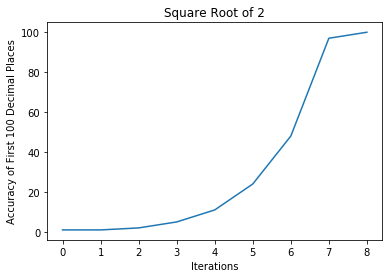

In [5]:
#part (a)
import numpy as M

i = 0        #number of iterations initiate
a = 2        #number taking the sqrt of
n = 100      #number of decimal places you want accuracy for
y = 10**n    #accuracy of n decimal places
diff = 1
listY = []   #create empty list to store y-values
listAcc = [] #create empty list to store accuracy values

while diff != 0:
    i = i + 1
    y_store = y
    y = (y + (10**(2*n)*a//y)) // 2      #gives the first n decimal places of sqrt(a)
    listY.append(y)
    diff = y - y_store
    
    #accuracy estimate:
    accuracy = len(str(listY[-1])) - len(str(diff))
    listAcc.append(accuracy)
    
print("First",n,"decimal places of sqrt(",a,") is ",y) 
print("")
print("Number of iterations = ",i)
print("Difference = ",diff)
print("")
#need to figure out how to plot the ACCURACY of the estimation!!
%matplotlib inline          
import matplotlib.pyplot as P
P.plot(listAcc)
P.ylabel('Accuracy of First '+str(n)+' Decimal Places')
P.xlabel('Iterations')
P.title('Square Root of '+str(a))
P.show()

First 100 decimal places of sqrt(2) is 14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727 with 9 iterations.


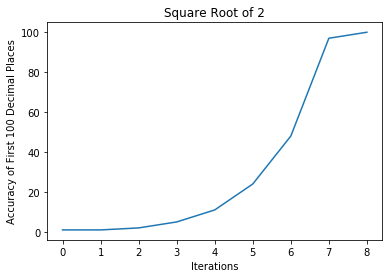

In [6]:
#part (b)
import numpy as M


listY = []   #create empty list to store y-values
listAcc = [] #create empty list to store accuracy values
def sqrtFn(a,n):

    i = 0        #number of iterations initiate
    a = 2        #number taking the sqrt of
    n = 100      #number of decimal places
    y = 10**n    #accuracy of n decimal places
    diff = 1
    
    while diff != 0:
        i = i + 1
        y_store = y
        y = (y + (10**(2*n)*a//y)) // 2      #gives the first n decimal places of sqrt(a)
        listY.append(y)
        diff = y - y_store
        #accuracy estimate:
        accuracy = len(str(listY[-1])) - len(str(diff))
        listAcc.append(accuracy)
    
    return "First "+str(n)+" decimal places of sqrt("+str(a)+") is "+str(y)+" with "+str(i)+" iterations."

print(sqrtFn(2,100))

%matplotlib inline
import matplotlib.pyplot as P
P.plot(listAcc)
P.ylabel('Accuracy of First '+str(n)+' Decimal Places')
P.xlabel('Iterations')
P.title('Square Root of '+str(a))
P.show()

**part (c):**   
$x = a^{1/k}$  and  $x = a/(x^{k-1})$  and  $x = a^{1/k} + \delta$

Now, replace my value for x:
$\frac{a}{x^{k-1}} = \frac{a}{(a^{1/k} + \delta)^{k-1}}$

Using the fact that:
$$ \frac{1}{1+z} = 1 - z + z^2 - z^3 + \ldots  \qquad \text{(when } z<1,$$
we may rewrite the rightmost expression for $\frac{a}{x^{k-1}}$ as:
$$ \frac{a}{a^{(k-1)/k} + (k-1)(a^{-1/k})\delta + O(\delta^2)} = \frac{a}{a^{(k-1)/k}} \frac{1}{1 + (k-1)(a^{-1/k})\delta + O(\delta^2)}$$ 

With some simplifying and replacing $\delta$ with $x-a^{1/k}$, we get:
$$ \frac{a}{x^{k-1}} = a^{1/k} - (k-1)(x-a^{1/k}) + O(\delta^2) $$

Now, using some algebra to solve for $a^{1/k}$, ignoring the negligibly small $O(\delta^2)$, we get:
$$ x = a^{1/k} = \frac{(k-1)x + ax^{1-k}}{k} $$

Then, multiply both sides by $10^{n}$ to get:
$$ (10^{n})x = \frac{(k-1)(10^{n})x + a(10^{n})/x^{k-1}}{k} $$

So, replacing $10^{n}$ with $y$, the final result is:
$$ y = \frac{(k-1)y + a(10^{kn})/y^{k-1}}{k} $$

In [45]:
#part (d)
import numpy as M

def rootFn(a,n,k):

    i = 0        #number of iterations initiate
    y = 10**n    #accuracy of n decimal places
    diff = 1
    listY = [y]   #empty list to store y-values

    while diff != 0:
        i = i + 1
        y = ((k-1)*y + (10**(k*n)*a//y**(k-1))) // k      #gives the first n decimal places of k-th root(a)
        listY.append(y)
        diff = listY[-1] - listY[-2]
    
    return i,listY[-1]

print(rootFn(2,100,3))

(9, 12599210498948731647672106072782283505702514647015079800819751121552996765139594837293965624362550941)


Part E:
Use your code to plot (i) the number of iterations until convergence  for the `k`'th root of 2 to 100 digits for `k` = 1,2,3,...10; (ii) The 100'th digit for the 4'th root of $a$ for $a$ = 1,2,...,20, as a function of $a$.

[2, 9, 9, 9, 9, 9, 9, 9, 9, 9] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


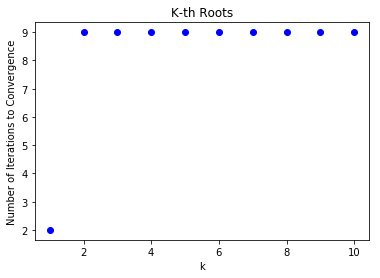

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] ['0', '3', '1', '2', '5', '9', '2', '2', '5', '5', '0', '6', '7', '2', '9', '0', '1', '6', '8', '8']


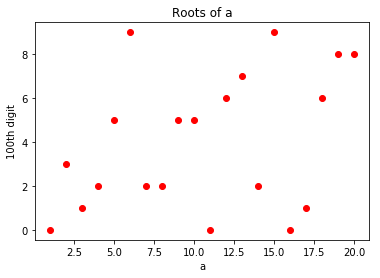

In [54]:
#part (e)
#part (i)
import numpy as M

def rootFn(a,n,k):

    i = 0        #number of iterations initiate
    y = 10**n    #accuracy of n decimal places
    diff = 1
    listY = [y]   #empty list to store y-values

    while diff != 0:
        i = i + 1
        y = ((k-1)*y + (10**(k*n)*a//y**(k-1))) // k      #gives the first n decimal places of k-th root(a)
        listY.append(y)
        diff = listY[-1] - listY[-2]
    
    return i,listY[-1]

listI = []         #create empty list for iteration values
listK = []         #create empty list for k-values of root
for k in range(1,11):
    
    i,null = rootFn(2,100,k)
    listI.append(i)
    listK.append(k)

print(listI,listK)
    
%matplotlib inline
import matplotlib.pyplot as P
P.plot(listK, listI, 'bo')
P.ylabel('Number of Iterations to Convergence')
P.xlabel('k')
P.title('K-th Roots')
P.show()

#part (ii)
import numpy as M

def rootFn(a,n,k):

    i = 0        #number of iterations initiate
    y = 10**n    #accuracy of n decimal places
    diff = 1
    listY = [y]   #empty list to store y-values
    
    while diff != 0:
        i = i + 1
        y = ((k-1)*y + (10**(k*n)*a//y**(k-1))) // k      #gives the first n decimal places of k-th root(a)
        listY.append(y)
        diff = listY[-1] - listY[-2]
    
    return i,listY[-1]

listA = []         #create empty list for a-values to take kth root of
listD = []         #empty list to store 100th digit

for a in range(1,21):
    
    i,y = rootFn(a,100,4)
    digit = str(str(y))[99]
    listD.append(digit)
    listA.append(a)

print(listA,listD)
    
%matplotlib inline
import matplotlib.pyplot as P
P.plot(listA, listD, 'ro')
P.ylabel('100th digit')
P.xlabel('a')
P.title('Roots of a')
P.show()


__(2)__ Take your "Collatz Conjecture" code (Exercises 3.1) and turn it into a function.  The function input is the starting value, and the function output is the number of iterations until the Collatz sequence reaches 1. Plot the number of iterations as a function of starting value for starting values 1 up to 1000. Give also a histogram of number of iterations for the same starting values.

Number of iterations for 19 to reach 1 is 20
Number of iterations for 27 to reach 1 is 111


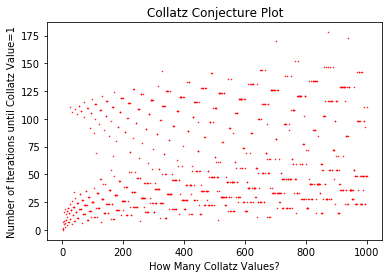

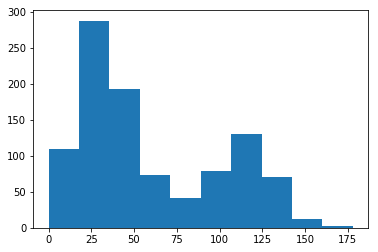

In [12]:
import numpy as M

def collatzFn(k):

    #Initialization step
    a=k
    n=0      #iterations

    #Iteration step
    while a > 1:
        
        n=n+1
        a=((1-(a%2))*a/2 + (a%2)*(3*a+1))
    
    return n

k19 = collatzFn(19)       #check function with values from exercise 3.1
print("Number of iterations for 19 to reach 1 is "+str(k19))
k27 = collatzFn(27)
print("Number of iterations for 27 to reach 1 is "+str(k27))


%matplotlib inline
import matplotlib.pyplot as P

#create vectors to input for my plot and histogram
C = 1000
CollatzValVec = M.arange(1,C+1,1)
CollatzVector = M.zeros(C)
for j in range(1,C):
    CollatzVector[j] = collatzFn(j+1)  

P.plot(CollatzValVec, CollatzVector, 'ro', markersize=0.5)
P.ylabel('Number of Iterations until Collatz Value=1')
P.xlabel('How Many Collatz Values?')
P.title('Collatz Conjecture Plot')
P.show()

P.hist(CollatzVector)
P.show()

__(3)__ Create a function `MandelbrotFn` whose inputs are $c,R$, and $N$, where $c$ is complex, $R$ is real, and $N$ is an integer. The output is a single integer $n$. To understand the following description it will be helpful if you re-read  Exercise 5 from Section 3.3.  Your function will start at $z=0$ and iterate the function $f(z)=z^2+c$ until the absolute value of the result is greater than $R$.  If after $N$ iterations the absolute value never exceeds $R$, then  the function should return the value $N$. 

In [54]:
import cmath as k
import numpy as M

def MandelbrotFn(c,R,N):
    
    #Initialize my z and iteration counter n
    z=0
    n=0

    #Iteration step
    while abs(z) <= R and n <= N:   
        n=n+1
        z=z**2+c

    return "After "+str(N)+" iterations, the abs.value of f("+str(z)+")="+str(abs(z))

Test1 = MandelbrotFn(0,2,1000)   #check function with values from 3.3#5 
print(Test1)
Test2 = MandelbrotFn(1j+1,10,1000)
print(Test2)


After 1000 iterations, the abs.value of f(0)=0
After 1000 iterations, the abs.value of f((1-97j))=97.0051545022222


__(4)__ 
_(a)_ Create a function `bGenFn` based on Exercises 6a in Exercises 14.2. The inputs are `p_,p1_,M_,N_,k_` and the output is `bMx`.

**Given parameters p, p1, M, N, k, create a matrix representing M sequences of N trials, where the first k trials have probability p of producing 1, and the last N-k have probability p1 of producing 1. Call your matrix bMx2. You may use the values p=0.1, p1=0.15, M=500, N=100, k=50.**


In [39]:
#part (a)
import numpy as U
%matplotlib inline
import matplotlib.pyplot as P

def bGenFn(p,p1,M,N,k): 

    kTrials = U.random.binomial(1,p,(M,k))
    NkTrials = U.random.binomial(1,p1,(M,N-k))
    bMx = U.concatenate((kTrials,NkTrials),axis=1)
    
    return bMx

#part (b)
def bLogFn(bMx_,p,p1,N,k):         #Taking log of probabilities (k=good;N-k=bad)
    bMx1 = bMx_[:, 0:k]      #Call first k entries from bMx_
    bSum1 = U.sum(bMx1,axis=1)  #Sum the first k entries
    bMx2 = bMx_[:, k:N]      #Call last N-k entries from bMx_
    bSum2 = U.sum(bMx2,axis=1)  #Sum the last N-k entries
    bLog1 = bSum1*(U.log(p)-U.log(1-p))+k*U.log(1-p)    # 
    bLog2 = bSum2*(U.log(p1)-U.log(1-p1))+(N-k)*U.log(1-p1)   
    bLog = bLog1 + bLog2
    
    return bLog

#part (c)
p = 0.1
p1 = 0.15
def bLogAltFn(bMx_,p,p1,N,d):
    bLogAltSum = 0
    for k in range(0,N-d):
        
        bLogAlt = U.exp(bLogFn(bMx_,p,p1,N,k)) 
        
        bLogAltSum = bLogAltSum + bLogAlt      #cumulative sum
    
    LogAverage = U.log(bLogAltSum / (N-d))     #log of averages
    
    return LogAverage

#part (d)
#create my NULL HYPOTHESIS
p = 0.05
p1 = 0.1
M = 5000
N = 100
k = 100
d = 6
q = 95

Null = bGenFn(p,p,M,N,N)  #creating Null matrix

#evaluate Logs and find the difference btwn Logs and Averages of Logs
bLog_1 = bLogFn(Null,p,p1,N,N)             #Evaluate Null hyp
bLogAlt_1 = bLogAltFn(Null,p,p1,N,d)       #Evaluate Alt hyp
bDiff = U.sort(bLogAlt_1 - bLog_1)            #Log of LR

#plot results of the difference
P.plot(bDiff, 'go', markersize=0.25)
P.ylabel('')
P.xlabel('')
P.title('')
P.show()

#finding q-th percentile
qth = U.percentile(bDiff,q,axis=0)
print("q-th percentile is",qth)

#part (d) - last bulletpoint
#find new values using p1=0.1
for k in range(0,N-d):
    AltnMx = bGenFn(p,p1,M,N,k)
    #evaluate Logs and find the difference btwn Logs and Averages of Logs
    bLog_2 = bLogFn(AltnMx,p,p,N,N)  #testing Null Hypothesis under assumption it does not go bad (how many docs "going bad")?
    bLogAlt_2 = bLogAltFn(AltnMx,p,p1,N,d)  #testing where it goes bad (closer to alt or null hypothesis)?
    bDiff2 = U.sort(bLogAlt_2 - bLog_2)   #Log of LR (for each scenario --> there's (N-d) scenarios to test)
    #finding values greater than qth percentile
    ValBigQ = bDiff2>=qth  #need proportionate values not actual values - do sum instead!!!
    SumValBigQ = U.sum(ValBigQ)/M  #/M gives proportion detected
    #plot detection rate
    P.plot(k,SumValBigQ, 'ro', markersize=0.5)
    P.ylabel('Values Greater than q')
    P.xlabel('k')
    P.title('Detection Rate')
P.show()



_(b)_ Create a function `bLogFn`. The inputs are `bMx_,p_,p1_,M_,N_,k_`. The output is a vector of log probabilities, calculated under the assumption that the first `k` trials have success probability `p`, and the last `N-k` trials have success probability `p1`. 

_(c)_ Create a function `bLogAltFn`. The inputs are `bMx_,p_,p1_,M_,N_,k_,d_`. The output is the average of `N- d` vectors generated using  `bLog`, under the assumption that the first `k` trials have success probability `p` and the last `N-k` trials have success probability `p1` for `k = 0,1,...N-d-1`. 

_(d)_. Write a code that accomplishes the following steps:

* Generate a `M` by `N` matrix of Bernoulli trials with all trials having success probability `p`. This is the "Null hypothesis". Use `M=500, N=100,p=0.05`.
* Evaluate the vector `bLog` under the assumption that `k=N`. Evaluate `bLogAlt` (using `d=6`), take the different between `bLogAlt - bLog` and sort. Plot the result.
* Find the `q`th percentile of these values. (You may look up "percentile" in a statistics book.)  This will be our cutoff. In your code, you may use `q=0.95` (i.e. 95 percent). This corresponds to a 5 percent false alarm probability


* For each value `k-0,1,...N-d-1`, create a `M` by `N` matrix of Bernoulli trials with the first `k` trials having success probability `p` and the last `N-k` trials with success probability `p1` (use `p1=0.1`). Evaluate `bLog` and `bLogAlt`, and `bLogAlt - bLog`. Find the proportion of values that are greater than `q`. Plot this proportion as a function of `k`.  This is the detection rate. 

__(5)__ This is another actual research problem. We are interested in the covering properties of random intervals placed on a line,along which is randomly scattered a set of points. Suppose we have a set of points (which we will denote as $S$) randomly scattered along a long segment of length $L$, and we randomly place a unit interval $I$ somewhere on the segment. This randomly-placed interval will intersect $S$ in the set $I\cap S$.  There are several questions:

* How many different possible sets $I \cap S$ are there? 
* What is the probability distribution of choosing these different sets, if the interval $I$ is placed randomly on the segment?
* The points of $S$ may be in multiple distinct sets $I \cap S$.  What is the probability distribution of the number of sets which include a given point?

There are two ways of attacking this problem. We could either do a random simulation, or we could do systematic counting.  In this case we will do systematic counting (which is usually faster when it's possible).

We may consider the segment as the real interval $[0,L]$. The leftmost position of the unit interval will be $[0,1]$, and in general the unit interval will have the form $[x,x+1]$ where $0 \le x \le L-1$. Consider "scanning" the unit interval across the segment, from $x=0$ to $x=L-1$. Every time a point of $S$ enters from the left or leaves from the right, the set $S \cap I$ changes. a point $s \in S$ enters the interval when $x+1 = s$, and the point leaves the interval when $x=s$. Therefore, during the scanning process the set changes every time either $x=s$ or $x = s-1$ for some point $s \in S$. So suppose we enumerate the sets $S = \{s_1, \ldots, s_N\}$ and the set $S' = \{s_1-1, \ldots, s_N-1\}$. We may take the union $S \cup S'$ and sort: then each point in $S \cup S'$ indicates a change in $I \cap S$ during the scanning process, and the intervals between points divided by $L$ gives the probabilities of the different intersections. This means that except for the points in $S$ which are in the intervals $[0,1]$ and $[L-1,L]$,  the number of different subsets $S \cap I$ will be $2N$.**(Answer should be 2N...this is NOT a part of the coding!!!)** The number of sets that $s$ is included in is the number of points in $S \cup S'$ between $s-1$ and $s$.

_(a)_ Write a program to count the number of possible sets and to plot the probabilities of these sets and the number of sets containing each point. Using L = 1E5 and N = 1E6.  

_Hints_  You may use the following procedure in your code:
* Generate $S$ as a vector using uniform random number generation
* Create $S'$ as a vector, and remove elements from $S'$ that are less than 0.
* Concatenate $S$ and $S'$ and sort. This is $S \cup S'$.
* Find the differences between consecutive entries in $S \cup S'$, and plot the histogram. This gives the probabilities of the different sets.
* To find the number of different sets containing each point:
    - Loop through all the entries in $S$ (denote the current element as $s$:
    - Count the number of elements in $S$ that are between $s$ and $s-1$.
    - Count the number of elements in $S'$ that are between $s$ and $s-1$.
    - Add these counts together, and store the value.  The sum of these two counts is the number of sets containing $s$.
    
Here are some harder problems:

* Answer the same questions for unit squares in a large .square region of side $L$; 
* Answer the same questions for  unit disks (disk of unitFind the differences between consecutive entries in  aAnswer the , and plot the histogram. This gives the probabilities of the different sets.
* rea) in a large square region of side $L$
* Answer the same questions for unit hypercubes within a large hypercube of side $L$.

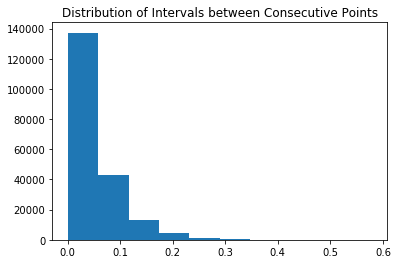

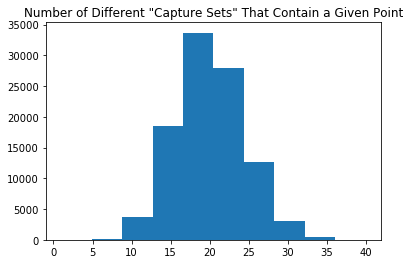

In [23]:
#part (a)
import numpy as M
L = 10000     #set segment length L (using smaller values to test code)
N = 100000     #number of points N (using smaller values to test code)

S = M.random.uniform(0,L,M.int(N))
S2 = S - 1

#S2positive = S2[S2>=0]    #searches value-by-value and selects only >=0
S2 = S2[S2>=0]

#SuS2 = M.sort(M.concatenate((S,S2positive),axis=0))
SuS2 = M.sort(M.concatenate((S,S2),axis=0))

DiffList = M.diff(SuS2)   #googled
    
%matplotlib inline
import matplotlib.pyplot as P

P.hist(DiffList)
P.title('Distribution of Intervals between Consecutive Points')
P.show()


CountTotal = []
for i in range(0,N):     
    s = S[i]
    Count1 = ((s-1 < S) & (S < s)).sum()   #googled this formula in a python blog
    Count2 = ((s-1 < S2) & (S2 < s)).sum()
    CountTotal.append((Count1 + Count2))
#print(CountTotal)    

P.hist(CountTotal)  #Number of sets that s_i is included in
P.title('Number of Different "Capture Sets" That Contain a Given Point')
P.xlabel('Capture Set')
P.ylabel('Number of Points Captured')
P.show()

In [ ]:
#harder problem 1


In [ ]:
#harder problem 2


In [ ]:
#harder problem 3
